In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1. EDA

#### 1a. Data Loading and Initial Inspection
Loaded the dataset into a DataFramem, identified data types, and verifed absence of missing data

In [20]:
# data loading
data = pd.read_csv("XYZdata.csv")

In [21]:
data.head(5)

,user_id,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,...,delta_subscriber_friend_cnt,delta_songsListened,delta_lovedTracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country,adopter
0,10,24,0,20,26.333333,0.777778,6,0,37804,4,...,0,54,0,0,0,0,79,0,0,0
1,137,22,1,4,21.250000,0.750000,1,0,774,0,...,0,0,0,0,0,0,60,0,0,0
2,306,18,0,3,18.500000,0.666667,1,0,14036,1,...,0,0,0,0,0,0,41,1,0,0
3,336,24,1,131,23.907407,0.431034,22,4,3457,227,...,2,865,7,0,0,4,79,0,0,0
4,355,23,1,15,21.555556,0.461538,2,1,7506,0,...,0,-4,0,0,0,6,70,0,0,0


In [22]:
# check dataset shapes, column types, and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      41540 non-null  int64  
 1   age                          41540 non-null  int64  
 2   male                         41540 non-null  int64  
 3   friend_cnt                   41540 non-null  int64  
 4   avg_friend_age               41540 non-null  float64
 5   avg_friend_male              41540 non-null  float64
 6   friend_country_cnt           41540 non-null  int64  
 7   subscriber_friend_cnt        41540 non-null  int64  
 8   songsListened                41540 non-null  int64  
 9   lovedTracks                  41540 non-null  int64  
 10  posts                        41540 non-null  int64  
 11  playlists                    41540 non-null  int64  
 12  shouts                       41540 non-null  int64  
 13  delta_friend_cnt

##### Summary of 1a
- The dataset contains 41,450 user records with 27 features.
- All columns are numerical (`int64` or `float64`), with no missing values

#### 1b Class Distribution and Imbalance Check
Assess class imbalance for target variable and examined key categorical predictors

In [12]:
# define categorical and numerical columns
categorical_cols = ['male', 'good_country', 'adopter']
numerical_cols = [col for col in data.columns if col not in categorical_cols]

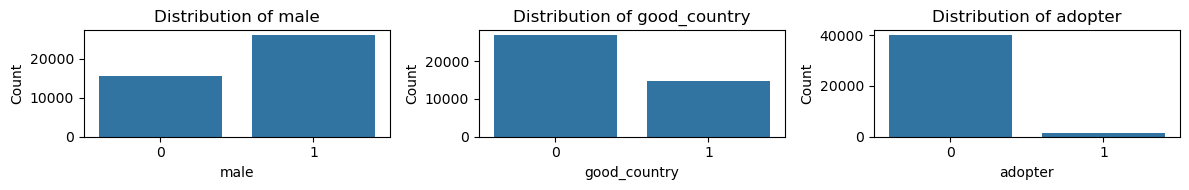

       Adopter  Count  Proportions (%)
0      Adopter  25941        62.448243
1  Non-Adopter  15599        37.551757
       Adopter  Count  Proportions (%)
0      Adopter  26887        64.725566
1  Non-Adopter  14653        35.274434
       Adopter  Count  Proportions (%)
0      Adopter  40000         96.29273
1  Non-Adopter   1540          3.70727


In [50]:
plt.figure(figsize=(12, 2))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('categorical_distributions.png')
plt.show()

for i, col in enumerate(categorical_cols, 1):
    class_counts = data[col].value_counts()
    class_props = data[col].value_counts(normalize=True) * 100
    class_table = pd.DataFrame({'Adopter':['Adopter', 'Non-Adopter'], 'Count': class_counts.values, 'Proportions (%)': class_props.values})
    print(class_table)


##### Summary of 1b
- The target variable `adopter` is highly imbalanced, with only ~3.7% of users being premium subscribers, which could bias models toward predicting non-adopters

#### 1c Feature Distribution and Outlier Check
Explored distribution and outlier presence for key numerical features

                       mean           std  min     50%       max
age               24.005031      6.395873  8.0    23.0      78.0
friend_cnt        19.436495     64.604406  1.0     7.0    6437.0
songsListened  18598.273375  29152.079493  0.0  8102.0  922370.0
lovedTracks       92.518560    267.061240  0.0    16.0   10252.0
tenure            44.379803     19.708478  1.0    45.0     108.0


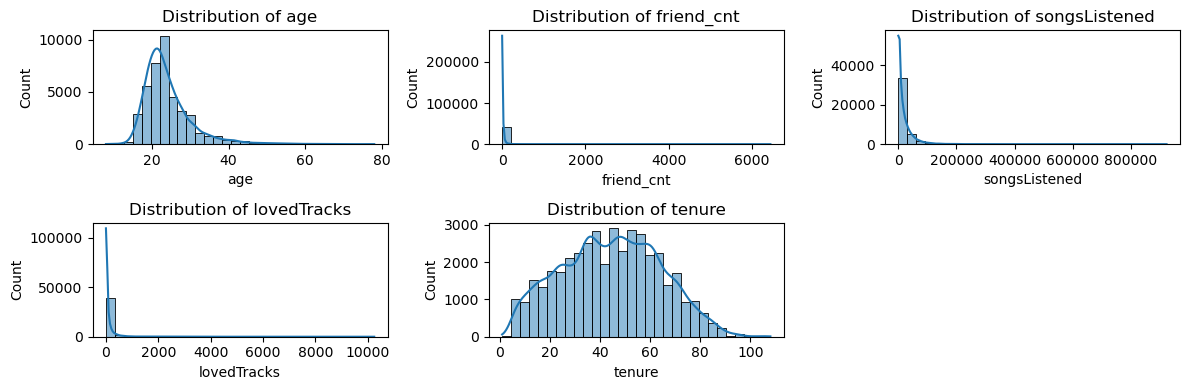

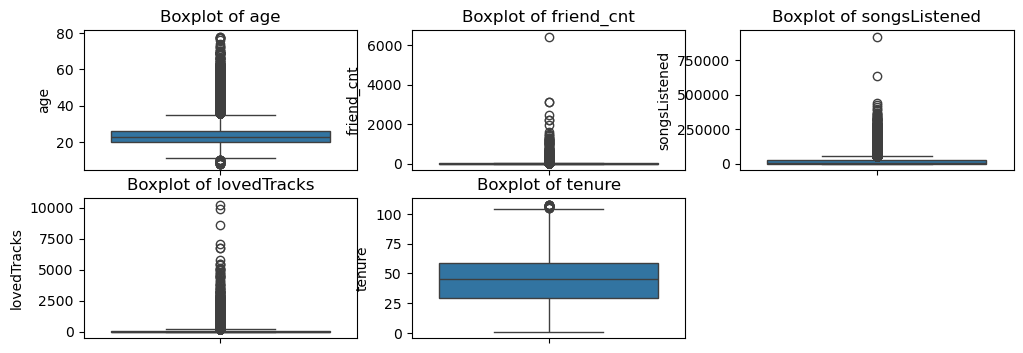

In [62]:
key_numerical_cols = ['age', 'friend_cnt', 'songsListened', 'lovedTracks', 'tenure']

# Table: Summary statistics
summary_table = data[key_numerical_cols].describe().T[['mean', 'std', 'min', '50%', 'max']]
print(summary_table)

# histogram
plt.figure(figsize=(12, 4))
for i, col in enumerate(key_numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('key_feature_distributions.png')
plt.show()

# boxplot
plt.figure(figsize=(12, 4))
for i, col in enumerate(key_numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout
plt.savefig('feature_boxplots.png')
plt.show()

##### Summary of 1c
- Age: Right-skewed, concentrated betweeen 18-30, with a few outliers.
- Friend count: Extremely right-skewed, extreme outliers up to ~6500
- Songs listened & Loved Tracks: Extremely Right-skewed with long-tailed distributions
- Tenure: Mile right-skewed

#### 1d Feature-Target Relationships
Compared feature distribution between adopters and non-adopters usering boxplot

In [60]:
# Table: Numerical featurees by adopter
num_summary = data.groupby('adopter')[key_numerical_cols].agg(['mean', 'median']).reset_index()
num_summary.columns = ['adopter'] + [f'{col}_{stat}' for col, stat in num_summary.columns[1:]]
print("Numerical Features by Adopter")
print("------------------------------------------------")
print(num_summary)

# Table: Categorical features by adopter
cat_summary = pd.concat([
    pd.crosstab(data['male'], data['adopter']),
    pd.crosstab(data['good_country'], data['adopter']),
], axis=0)
cat_summary.index = ['Male_0', 'Male_1', 'Good_Country_0', 'Good_Country_1']
cat_summary.columns = ['Adopter_0', 'Adopter_1']
cat_summary['Total'] = cat_summary.sum(axis=1)
cat_summary['Adoption_Rate(%))'] = (cat_summary['Adopter_1'] / cat_summary['Total']) * 100
print("\nCategorical Features by Adopter")
print("------------------------------------------------")
print(cat_summary)

Numerical Features by Adopter
------------------------------------------------
   adopter   age_mean  age_median  friend_cnt_mean  friend_cnt_median  \
0        0  23.935125        23.0        18.760600                7.0   
1        1  25.820779        24.0        36.992208               16.0   

   songsListened_mean  songsListened_median  lovedTracks_mean  \
0        18098.183975                7717.0         86.554750   
1        31587.608442               19601.0        247.422727   

   lovedTracks_median  tenure_mean  tenure_median  
0                15.0    44.333850           45.0  
1               100.5    45.573377           47.0  

Categorical Features by Adopter
------------------------------------------------
                Adopter_0  Adopter_1  Total  Adoption_Rate(%))
Male_0              15176        423  15599           2.711712
Male_1              24824       1117  25941           4.305925
Good_Country_0      25756       1131  26887           4.206494
Good_Country_1 

##### Summary of 1d
- For the numerical features, adopters tend to have more friends, listen to more songs, and love more tracks.
- For the categorical features, the adoption rate is higher for males and those from good countries.

#### Next Steps
- Address imbalanced of adopters
- Apply log transformation for skewed features
- Scale tenure and age, create age groups
- Create new features
    - monthly listened Ratio: songsListened / tenure
    - monthly friend ratio: friend_cnt / tenure
    - engagement: lovedTracks / songsListened

### 2. Perprocessing


In [5]:
data = pd.read_csv("XYZdata.csv")

#### 2a. Feature Engineering
- Create new features to capture user engagement and usuage behavior
- Categorize age_group

In [6]:
# Create new features
data['monthly_listen'] = data['songsListened'] / (data['tenure'] + 1)
data['monthly_love'] = data['lovedTracks'] / (data['tenure'] + 1)
data['monthly_friend'] = data['friend_cnt'] / (data['tenure'] + 1)
data['engagement'] = data['lovedTracks'] / (data['songsListened'] + 1)

In [7]:
# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
age_group_summary = data.groupby('age_group')['adopter'].value_counts(normalize=True).unstack() * 100
print(age_group_summary)

adopter            0         1
age_group                     
0-18       98.468271  1.531729
19-25      96.863126  3.136874
26-35      94.972160  5.027840
36-45      94.712991  5.287009
46-55      94.193548  5.806452
56-65      93.430657  6.569343
65+        94.117647  5.882353


/var/folders/d5/qfz78tj953j7xd9fmq3gbqk40000gn/T/ipykernel_98909/1519516327.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = data.groupby('age_group')['adopter'].value_counts(normalize=True).unstack() * 100


#### 2b. Normalization & Train-test split & OverSampling
- Perform 80/20 stratified split
- Applied log transformation to skewed numerical variables
- Applied one-hot encoding on age variable
- Oversample to 7:3 ratio


In [ ]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [21]:
features = ['age', 'male', 'friend_cnt', 'avg_friend_age',
       'avg_friend_male', 'friend_country_cnt', 'subscriber_friend_cnt',
       'songsListened', 'lovedTracks', 'posts', 'playlists', 'shouts',
       'delta_friend_cnt', 'delta_avg_friend_age', 'delta_avg_friend_male',
       'delta_friend_country_cnt', 'delta_subscriber_friend_cnt',
       'delta_songsListened', 'delta_lovedTracks', 'delta_posts',
       'delta_playlists', 'delta_shouts', 'tenure', 'good_country',
       'delta_good_country', 'monthly_listen', 'monthly_love',
       'engagement', 'monthly_friend', 'age_group']

X = data[features]
y = data['adopter']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [27]:
# Define the processing columns and transformations
skewed_features = ['friend_cnt', 'songsListened', 'lovedTracks', 
              'monthly_listen', 'monthly_love', 'monthly_friend', 'engagement']
num_features = ['avg_friend_age','avg_friend_male', 'friend_country_cnt', 'subscriber_friend_cnt',
       'posts', 'playlists', 'shouts',
       'delta_friend_cnt', 'delta_avg_friend_age', 'delta_avg_friend_male',
       'delta_friend_country_cnt', 'delta_subscriber_friend_cnt',
       'delta_songsListened', 'delta_lovedTracks', 'delta_posts',
       'delta_playlists', 'delta_shouts', 'tenure',
       'delta_good_country']
cat_features = ['good_country', 'male']
age_group_feature = ['age_group']

# Define a function to generate feature names for the log transformation
def get_log_feature_names_out(transformer, input_features):
    return [f"log_{feat}" for feat in input_features]

# Create a FunctionTransformer for log transformation with custom feature names
log_transformer = FunctionTransformer(
    np.log1p, 
    validate=False, 
    feature_names_out=get_log_feature_names_out
)

preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, skewed_features),
        ('scaler', StandardScaler(), skewed_features + num_features),
        ('ohe', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), age_group_feature),
        ('cat', 'passthrough', cat_features),
    ],
    remainder='drop')

# fit and transform the training data, and transform the test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# address class imbalance using SMOTE (training set only)
smote = SMOTE(sampling_strategy=.3, random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)

In [28]:
features_names = preprocessor.get_feature_names_out()
X_train_bal = pd.DataFrame(X_train_bal, columns=features_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=features_names)

# Save the processed data
X_train_bal.to_csv('X_train_balanced.csv', index=False)
X_test_processed.to_csv('X_test_processed.csv', index=False)
y_train_bal.to_csv('y_train_balanced.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save the preprocessor for future use
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')
# Save the processed data for further analysis or modeling
print("Data processing complete. Processed data saved to CSV files and preprocessor saved as a joblib file.")

Data processing complete. Processed data saved to CSV files and preprocessor saved as a joblib file.


In [ ]:
# Check the shape of the balanced training set
print(f"Balanced training set shape: {X_train_bal.shape}, {y_train_bal.shape}")
# Check the distribution of the target variable in the balanced training set
print("Distribution of target variable in balanced training set:")
print(y_train_bal.value_counts(normalize=True) * 100)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Balanced training set shape: (41600, 42), (41600,)
Distribution of target variable in balanced training set:
adopter
0    76.923077
1    23.076923
Name: proportion, dtype: float64


### 3. Model Training and Evaluation

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [49]:
# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name, cost_fp=1, cost_fn=10):
    
    if hasattr(model, 'predict_proba'):  # For models like Random Forest
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For LightGBM
        y_proba = model.predict(X_test)  # LightGBM predict returns probabilities
    
    thresholds = np.arange(0, 1.01, 0.01)
    best_threshold = 0.5
    min_cost = float('inf')

    for threshold in thresholds:
        pred = (y_proba >= threshold).astype(int)
        cm = confusion_matrix(y_test, pred)
        fp = cm[0, 1]
        fn = cm[1, 0]
        total_cost = cost_fp * fp + cost_fn * fn
        if total_cost < min_cost:
            min_cost = total_cost
            best_threshold = threshold

    y_pred = (y_proba >= best_threshold).astype(int)

    print(f"Best threshold for {model_name}: {best_threshold:.2f}")
    print(f"Minimu total cost for {model_name}: {min_cost:.2f}")
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred, target_names=['Non-Adopter', 'Adopter']))
    
     # AUC-ROC curve
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score for {model_name}: {auc_score:.4f}")

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Adopter', 'Adopter'], 
                yticklabels=['Non-Adopter', 'Adopter'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{model_name}.png')
    plt.show()
    return y_pred, y_proba

In [32]:
## Load preprocessed data
X_train_bal = pd.read_csv('X_train_balanced.csv')
y_train_bal = pd.read_csv('y_train_balanced.csv')['adopter']
X_test = pd.read_csv('X_test_processed.csv')
y_test = pd.read_csv('y_test.csv')['adopter']

#### 3a. Baseline Model: Logistic Regression 
- A simple logistic regression is used as the baseline to evaluate future model
- 

Best threshold for Logistic Regression: 0.43
Minimu total cost for Logistic Regression: 2791.00
Model: Logistic Regression
              precision    recall  f1-score   support

 Non-Adopter       0.97      0.90      0.93      8000
     Adopter       0.12      0.36      0.18       308

    accuracy                           0.88      8308
   macro avg       0.55      0.63      0.56      8308
weighted avg       0.94      0.88      0.91      8308

ROC AUC Score for Logistic Regression: 0.7796


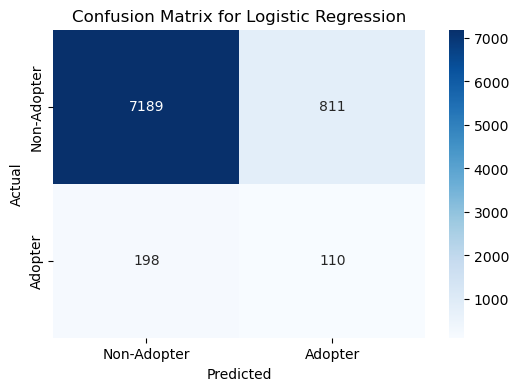

In [50]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_bal, y_train_bal)

logreg_pred, logreg_pred_proba = evaluate_model(logreg, X_test, y_test, 'Logistic Regression')

#### 3b. Random Forest Classifier with Hyperparameter Tuning

Fitting 3 folds for each of 32 candidates, totalling 96 fits



Best parameters from Grid Search: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score from Grid Search: 0.9034697711341485
Best threshold for Random Forest: 0.21
Minimu total cost for Random Forest: 2733.00
Model: Random Forest
              precision    recall  f1-score   support

 Non-Adopter       0.98      0.87      0.92      8000
     Adopter       0.12      0.44      0.19       308

    accuracy                           0.86      8308
   macro avg       0.55      0.66      0.55      8308
weighted avg       0.94      0.86      0.89      8308

ROC AUC Score for Random Forest: 0.8002


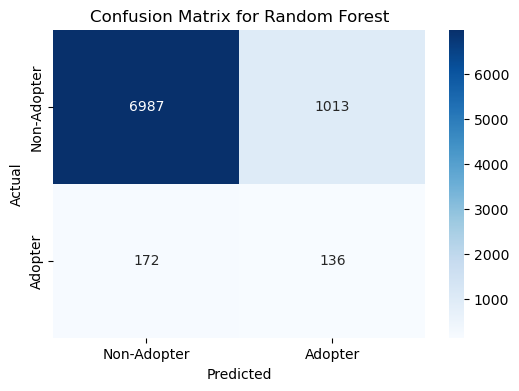

In [51]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', {0:1, 1:5}]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)

grid_search.fit(X_train_bal, y_train_bal)

print("\nBest parameters from Grid Search:", grid_search.best_params_)
print("Best F1 score from Grid Search:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
rf_pred, rf_pred_proba = evaluate_model(best_rf, X_test, y_test, 'Random Forest')

#### 3c. LightGBM with Hyperparameter Tuning

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best parameters from Grid Search for LightGBM: {'bagging_fraction': 0.7, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': -1, 'min_data_in_leaf': 10, 'num_leaves': 31}
Best F1 score from Grid Search for LightGBM: 0.906444507380181
Best threshold for LightGBM: 0.10
Minimu total cost for LightGBM: 2701.00
Model: LightGBM
              precision    recall  f1-score   support

 Non-Adopter       0.98      0.87      0.92      8000
     Adopter       0.12      0.45      0.19       308

    accuracy                           0.86      8308
   macro avg       0.55      0.66      0.56      8308
weighted avg       0.94      0.86      0.89      8308

ROC AUC Score for LightGBM: 0.8031


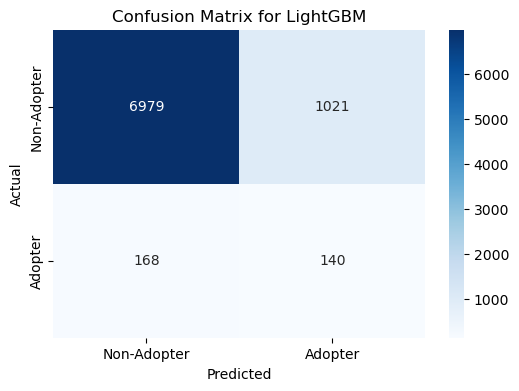

'\ngrid_search_lgb = GridSearchCV(lgb_model_base, param_grid_lgb, cv=3, scoring=\'f1\', n_jobs=-1, verbose=1)\ngrid_search_lgb.fit(X_train_bal, y_train_bal)\nprint("\nBest parameters from Grid Search for LightGBM:", grid_search_lgb.best_params_)\nprint("Best F1 score from Grid Search for LightGBM:", grid_search_lgb.best_score_)\nbest_lgb = grid_search_lgb.best_estimator_\n\nlgb_proba = best_lgb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class\nlgb_pred = (lgb_proba > 0.5).astype(int)\nprint(classification_report(y_test, lgb_pred, target_names=[\'Non-Adopter\', \'Adopter\']))\nauc_score_lgb = roc_auc_score(y_test, lgb_proba)\nprint(f"ROC AUC Score for LightGBM: {auc_score_lgb:.4f}")\ncm_lgb = confusion_matrix(y_test, lgb_pred)\nplt.figure(figsize=(6, 4))\nsns.heatmap(cm_lgb, annot=True, fmt=\'d\', cmap=\'Blues\', \n            xticklabels=[\'Non-Adopter\', \'Adopter\'], \n            yticklabels=[\'Non-Adopter\', \'Adopter\'])\nplt.title(\'Confusion Matrix for Lig

In [ ]:
import lightgbm as lgb

# LightGBM model
lgb_model_base = lgb.LGBMClassifier(random_state=42, n_jobs=-1)
param_grid_lgb = {
    'num_leaves': [20, 31],
    'learning_rate': [0.05, 0.1],
    'max_depth': [-1, 10],
    'min_data_in_leaf': [10, 20],
    'feature_fraction': [0.8, 0.9],
    'bagging_fraction': [0.7, 0.8]
}

grid_search_lgb = GridSearchCV(lgb_model_base, param_grid_lgb, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search_lgb.fit(X_train_bal, y_train_bal)
print("\nBest parameters from Grid Search for LightGBM:", grid_search_lgb.best_params_)
print("Best F1 score from Grid Search for LightGBM:", grid_search_lgb.best_score_)
best_lgb = grid_search_lgb.best_estimator_
lgb_pred, lgb_pred_proba = evaluate_model(best_lgb, X_test, y_test, 'LightGBM')